In [355]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import pickle
import warnings
warnings.filterwarnings('ignore')

In [332]:
# Load Dataset
data=pd.read_csv('car_sales_data.csv')

In [333]:
data.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [334]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [335]:
data['Model'].unique()

array(['Fiesta', '718 Cayman', 'Mondeo', 'RAV4', 'Polo', 'Focus', 'Prius',
       'Golf', 'Z4', 'Yaris', '911', 'Passat', 'M5', 'Cayenne', 'X3'],
      dtype=object)

In [336]:
data.describe()

,Engine size,Year of manufacture,Mileage,Price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.773058,2004.209440,112497.320700,13828.903160
std,0.734108,9.645965,71632.515602,16416.681336
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54352.250000,3060.750000
50%,1.600000,2004.000000,100987.500000,7971.500000
75%,2.000000,2012.000000,158601.000000,19026.500000
max,5.000000,2022.000000,453537.000000,168081.000000


In [337]:
# manufacturer_model mapping
manu_model_mapping=data.groupby('Manufacturer')['Model'].unique().apply(list).to_dict()

In [338]:
manu_model_mapping

{'BMW': ['Z4', 'M5', 'X3'],
 'Ford': ['Fiesta', 'Mondeo', 'Focus'],
 'Porsche': ['718 Cayman', '911', 'Cayenne'],
 'Toyota': ['RAV4', 'Prius', 'Yaris'],
 'VW': ['Polo', 'Golf', 'Passat']}

In [339]:
# Feature Selection
X=data.drop(columns=['Price','Manufacturer'])
y=data['Price']

In [340]:
# One-Hot Encoding
X = pd.get_dummies(X, columns=['Fuel type','Model'],dtype=int)

In [341]:
# Train-Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [342]:
X_train_scaled = X_train.copy()
X_test_scaled  = X_test.copy()

In [343]:
# Feature Scaling
ss=StandardScaler()	
num_cols=['Year of manufacture','Mileage','Engine size']
X_train_scaled[num_cols]=ss.fit_transform(X_train[num_cols])
X_test_scaled[num_cols]=ss.transform(X_test[num_cols])

In [344]:
# Linear Regression Model Training and Evaluation
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)
lr.score(X_train_scaled,y_train)*100,lr.score(X_test_scaled,y_test)*100


(71.61261852281558, 71.01938076024965)

In [345]:
# Decision Tree Regressor Model Training and Evaluation
dtr=DecisionTreeRegressor()
dtr.fit(X_train_scaled,y_train)
dtr.score(X_train_scaled,y_train)*100,dtr.score(X_test_scaled,y_test)*100

(100.0, 99.67716638493486)

In [346]:
# Random Forest Regressor Model Training and Evaluation
rf=RandomForestRegressor()
rf.fit(X_train_scaled,y_train)
rf.score(X_train_scaled,y_train)*100,rf.score(X_test_scaled,y_test)*100

(99.97741843150983, 99.85109744755096)

In [347]:
# XGBoost Regressor Model Training and Evaluation
xg=XGBRegressor()
xg.fit(X_train_scaled,y_train)
xg.score(X_train_scaled,y_train)*100,xg.score(X_test_scaled,y_test)*100

(99.93965029716492, 99.91020560264587)

In [356]:
para={'n_estimators':[100,200,300],'learning_rate':[0.1,0.01,0.05],'max_depth':[3,5,7]}
gs=GridSearchCV(estimator=XGBRegressor(),param_grid=para,scoring='r2',cv=5,n_jobs=-1,verbose=1)
gs.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=1)

In [358]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}

In [350]:
# Best Parameters after Hyperparameter Tuning
xg1=XGBRegressor(learning_rate=0.1,max_depth=7,n_estimators=300,n_jobs=-1)
xg1.fit(X_train_scaled,y_train)
xg1.score(X_train_scaled,y_train)*100,xg1.score(X_test_scaled,y_test)*100

(99.98213648796082, 99.95657801628113)

In [ ]:
print(f'r2_score : {r2_score(y_test,xg1.predict(X_test_scaled))*100}')

r2_score : 99.95657801628113


In [352]:

# Save model + training column names
with open("car_price_model.pkl", "wb") as f:
    pickle.dump(xg1, f)
with open("scaler.pkl", "wb") as f:
	 pickle.dump(ss, f)
       
with open("dummy_columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)
    
with open("manu_model_mapping.pkl", "wb") as f:
    pickle.dump(manu_model_mapping, f)

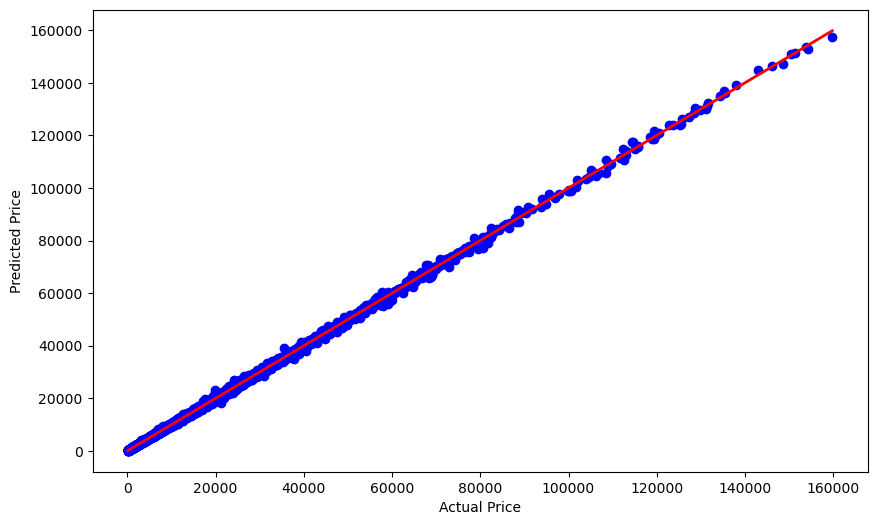

In [353]:
# Model Evaluation Visualization
plt.figure(figsize=(10,6))
plt.scatter(y_test,xg1.predict(X_test_scaled),color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2, label="Perfect Prediction")
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [354]:
# Conclusion
# The XGBoost Regressor model with hyperparameter tuning performed the best with an R² score of approximately 99.95% on the test set